In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data=pd.read_csv("Algerian_forest_fires1.csv")
data.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5


In [3]:
#checking data info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122 entries, 0 to 121
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          122 non-null    int64  
 1   month        122 non-null    int64  
 2   year         122 non-null    int64  
 3   Temperature  122 non-null    int64  
 4    RH          122 non-null    int64  
 5    Ws          122 non-null    int64  
 6   Rain         122 non-null    float64
 7   FFMC         122 non-null    float64
 8   DMC          122 non-null    float64
 9   DC           122 non-null    float64
 10  ISI          122 non-null    float64
 11  BUI          122 non-null    float64
 12  FWI          122 non-null    float64
dtypes: float64(7), int64(6)
memory usage: 12.5 KB


In [4]:
#checking null values
data.isnull().sum().sum()

# no null values present

0

In [5]:
#To check mean, min, SD etc
data.describe().T

,count,mean,std,min,25%,50%,75%,max
day,122.0,15.754098,8.843274,1.0,8.000,16.00,23.000,31.0
month,122.0,7.500000,1.115259,6.0,7.000,7.50,8.000,9.0
year,122.0,2012.000000,0.000000,2012.0,2012.000,2012.00,2012.000,2012.0
Temperature,122.0,31.180328,3.320401,22.0,29.000,31.00,34.000,37.0
RH,122.0,67.975410,11.154411,45.0,60.000,68.00,77.750,89.0
Ws,122.0,16.000000,2.848807,11.0,14.000,16.00,18.000,26.0
Rain,122.0,0.842623,2.409208,0.0,0.000,0.00,0.500,16.8
FFMC,122.0,74.672951,15.558713,28.6,65.925,80.90,86.775,90.3
DMC,122.0,12.314754,11.274360,0.7,3.725,9.45,16.300,54.2
DC,122.0,53.160656,51.778265,6.9,10.050,35.55,79.025,220.4


In [6]:
data.corr()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI
day,1.000000e+00,5.358691e-17,NaN,0.181092,-0.210608,0.063970,-0.097489,0.291751,0.542760,0.568644,0.371489,0.557301,0.467585
month,5.358691e-17,1.000000e+00,NaN,-0.035708,-0.088025,-0.007804,0.145180,-0.040746,-0.007624,-0.006211,-0.011281,-0.009113,0.003330
year,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Temperature,1.810918e-01,-3.570824e-02,NaN,1.000000,-0.660151,-0.228035,-0.486947,0.748423,0.541489,0.532838,0.663871,0.542210,0.608367
RH,-2.106080e-01,-8.802546e-02,NaN,-0.660151,1.000000,0.245774,0.329163,-0.653153,-0.347080,-0.314271,-0.586410,-0.338233,-0.476067
Ws,6.396952e-02,-7.803641e-03,NaN,-0.228035,0.245774,1.000000,0.349321,-0.211069,0.039394,0.099231,-0.039266,0.062212,0.029637
Rain,-9.748921e-02,1.451800e-01,NaN,-0.486947,0.329163,0.349321,1.000000,-0.573476,-0.265371,-0.283652,-0.366425,-0.271951,-0.292914
FFMC,2.917513e-01,-4.074604e-02,NaN,0.748423,-0.653153,-0.211069,-0.573476,1.000000,0.608512,0.575221,0.790086,0.600707,0.675553
DMC,5.427601e-01,-7.624391e-03,NaN,0.541489,-0.347080,0.039394,-0.265371,0.608512,1.000000,0.962193,0.750098,0.995551,0.901759
DC,5.686443e-01,-6.211283e-03,NaN,0.532838,-0.314271,0.099231,-0.283652,0.575221,0.962193,1.000000,0.717591,0.982554,0.869911


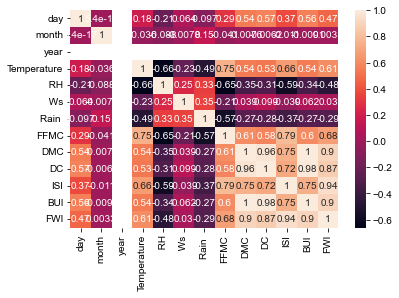

In [7]:
sns.heatmap(data.corr(),annot=True)
sns.set(rc={'figure.figsize':(5,5)})

#heatmap shows , there is high positive correlation between "FFMC" and "Temperature"
#there is high negatrive correlation between "RH" and "temperature"


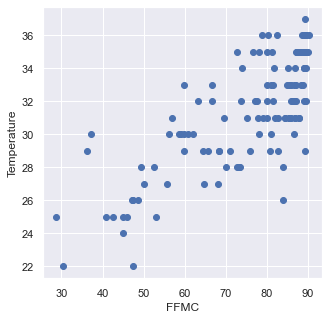

In [8]:
#lets check the above statement through scatter plot
#scatter plot with temperature and FFMC data
plt.scatter(data['FFMC'],data['Temperature'])
plt.xlabel("FFMC")
plt.ylabel("Temperature")
sns.set(rc={'figure.figsize':(8,6)})


positive correlation between FFMC and temperature is confirmed through scatter plot

<AxesSubplot:xlabel='FFMC', ylabel='Temperature'>

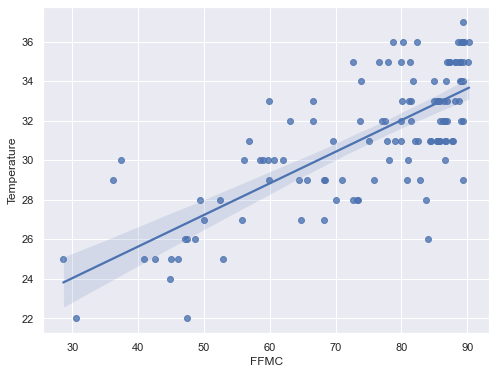

In [9]:
#creating a linear regression plot where input feature as FFMC and output as temperature
sns.regplot(x="FFMC",y="Temperature",data=data)

In [11]:
#creating independant and dependant variables
#independant variable x
x=data.drop(columns = ['Temperature'])

x

,day,month,year,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI
0,1,6,2012,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5
1,2,6,2012,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4
2,3,6,2012,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1
3,4,6,2012,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0
4,5,6,2012,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5
...,...,...,...,...,...,...,...,...,...,...,...,...
117,26,9,2012,54,11,0.0,82.0,6.0,16.3,2.5,6.2,1.7
118,27,9,2012,66,11,0.0,85.7,8.3,24.9,4.0,9.0,4.1
119,28,9,2012,47,14,0.7,77.5,7.1,8.8,1.8,6.8,0.9
120,29,9,2012,80,16,1.8,47.4,2.9,7.7,0.3,3.0,0.1


In [12]:
#dependant variable y
y=data['Temperature']
y

0      29
1      29
2      26
3      25
4      27
       ..
117    31
118    31
119    32
120    26
121    25
Name: Temperature, Length: 122, dtype: int64

In [13]:
#splitting the data as  train test data
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.33,random_state=10)

In [14]:
x_train.shape
#x_train has 13 features

(81, 12)

In [15]:
y_train.shape
#y_train has 1 feature i.e temperature

(81,)

In [16]:
x_test.shape

(41, 12)

In [17]:
y_test.shape

(41,)

In [18]:
#standardise or feature scaling
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler

StandardScaler()

In [19]:
x_train=scaler.fit_transform(x_train)
x_train

array([[ 1.39662887e+00, -4.13679344e-01,  0.00000000e+00,
         3.81175215e-01, -3.60768766e-01, -3.03602781e-01,
         7.75476283e-01,  1.21087087e+00,  1.41627894e+00,
         7.50439524e-01,  1.30104373e+00,  1.07879977e+00],
       [-1.46734425e+00, -4.13679344e-01,  0.00000000e+00,
         6.49655148e-01,  1.58738257e+00,  6.56438445e-03,
        -7.56562227e-01, -8.45986965e-01, -8.50841312e-01,
        -8.03532451e-01, -8.45690845e-01, -8.13249054e-01],
       [-1.13688582e+00,  4.68110837e-01,  0.00000000e+00,
         5.60161837e-01, -7.50399033e-01, -3.03602781e-01,
         7.62437657e-01,  4.16197349e-02, -2.75400772e-01,
         6.05883991e-01, -9.43337452e-02,  2.32356873e-01],
       [ 9.56017618e-01,  4.68110837e-01,  0.00000000e+00,
        -7.82237832e-01, -3.60768766e-01, -3.03602781e-01,
         9.25420477e-01,  2.67883580e+00,  2.46130976e+00,
         1.69005049e+00,  2.62262720e+00,  2.47294100e+00],
       [-6.96274567e-01,  4.68110837e-01,  0.0000000

In [22]:
x_test=scaler.transform(x_test)
x_test

array([[-1.67715934e+00,  4.14039336e-01,  0.00000000e+00,
        -1.98363288e+00, -6.49946707e-01, -4.38507299e-01,
         2.65241125e-01, -6.99679917e-01, -8.36426305e-01,
        -5.60030810e-01, -7.74871213e-01, -7.34898687e-01],
       [ 1.68015962e-01, -5.29050262e-01,  0.00000000e+00,
         8.81364154e-01,  1.46976585e+00, -4.38507299e-01,
        -1.27216931e-01, -4.83619909e-01, -5.35088020e-01,
        -9.39797250e-01, -5.05889579e-01, -8.07960875e-01],
       [-5.70054158e-01, -5.29050262e-01,  0.00000000e+00,
         2.34429340e-01, -9.52762787e-01, -1.72436274e-01,
        -5.07015050e-01, -5.81829003e-01, -8.54152086e-01,
        -8.22946038e-01, -6.92682380e-01, -7.93348438e-01],
       [-1.43113596e+00,  4.14039336e-01,  0.00000000e+00,
        -3.20086215e-01, -6.49946707e-01, -3.24476860e-01,
         1.25981815e-01, -6.11291732e-01, -8.40365368e-01,
        -6.47669219e-01, -7.15097517e-01, -7.49511125e-01],
       [ 6.60062709e-01,  1.35712893e+00,  0.0000000

MODEL Training

In [23]:
from sklearn.linear_model import LinearRegression
regression=LinearRegression()
regression


LinearRegression()

In [24]:
regression.fit(x_train,y_train)

LinearRegression()

In [25]:
#intercept 
print(regression.intercept_)

31.037037037037035


In [27]:
#predicting the data
y_pred=regression.predict(x_test)
y_pred

array([33.39637671, 29.93561659, 29.69040198, 31.66628715, 30.26198289,
       31.44107915, 29.60389109, 26.00678157, 34.40955302, 29.72712598,
       27.13420235, 31.88887889, 29.13085744, 30.44661936, 32.5267164 ,
       30.64513208, 34.12347847, 33.68528202, 32.357749  , 30.71536753,
       33.31746323, 34.21066136, 31.61369367, 27.91445836, 33.19556487,
       30.03717385, 27.87093939, 26.93125594, 34.60038878, 32.79452574,
       30.25865092, 27.40627107, 31.48735782, 24.67605077, 31.90867158,
       33.1219969 , 33.26818439, 32.65228994, 28.79003759, 33.45062438,
       34.2188783 ])

# Assumption of linear regression
#used to check whether the training model is good or bad

Text(0, 0.5, 'predicted data')

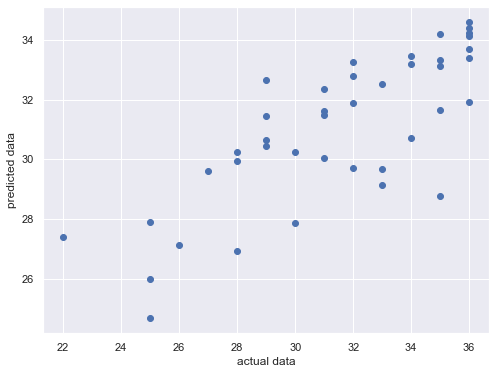

In [28]:
# 1) scatter plot between test and predicted data
import matplotlib.pyplot as plt
plt.scatter(y_test,y_pred)
plt.xlabel("actual data")
plt.ylabel("predicted data")


a linear positive correlation between the predicted and actual data(shown above) is desired and hence ok

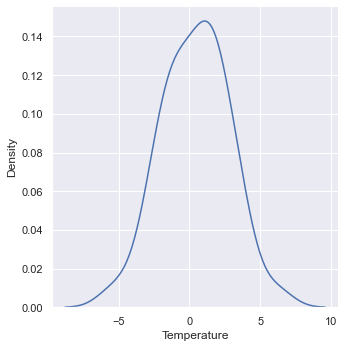

In [31]:
## 2) Distribution of residuals
residual=y_test-y_pred
residual
sns.displot(residual,kind="kde")


a gaussian distribution of the residual is expected, hence ok

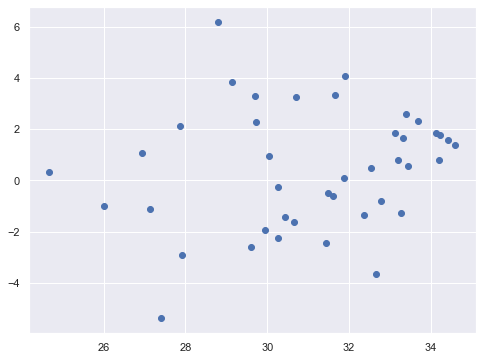

In [32]:
## 3) Scatter plot of predicted data and test data
plt.scatter(y_pred,residual)

a uniform distribution of predicted data and residual is expected as seen above, hence ok

In [33]:
## Performance Metrics
#R Square-
from sklearn.metrics import r2_score
R_square=r2_score(y_test,y_pred)
print(R_square)

0.5905432198949393


In [34]:
## Adjusted R square

1 - (1-R_square)*(len(y_test)-1)/(len(y_test)-x_test.shape[1]-1)

0.4150617427070562

# lets predict the temperature using  ridge regression

In [37]:
from sklearn.linear_model import Ridge
ridge=Ridge()
ridge

Ridge()

In [38]:
ridge.fit(x_train,y_train)

Ridge()

In [39]:
#print intercept using ridge regression
print(ridge.intercept_)

31.037037037037038


In [42]:
#prediction of test data
y_pred=ridge.predict(x_test)
y_pred


array([33.30071935, 29.65990782, 29.76257125, 31.56565518, 30.27434149,
       31.09901804, 29.99103013, 26.0070687 , 34.41348918, 29.86488134,
       26.83472467, 31.93374844, 28.85822688, 30.15356807, 32.45869836,
       30.59244637, 34.02049535, 33.71705232, 32.18119156, 30.86995625,
       33.10649967, 32.99338695, 31.61170307, 27.68061358, 33.46427292,
       30.0567473 , 27.91747688, 27.03983819, 34.69757839, 32.83738318,
       29.95474222, 27.14839429, 31.51569717, 25.1470402 , 32.02692973,
       33.30137128, 33.48690293, 33.02649467, 30.21868339, 33.6320084 ,
       34.09596334])

Text(0, 0.5, 'test predicted data')

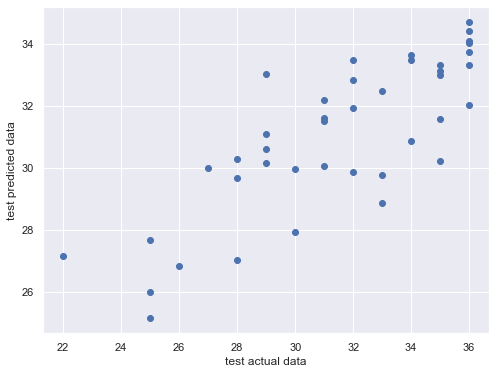

In [43]:
#Assumptions of ridge regression
# 1) scatter plot of test predicted data Vs test actual data should have positive correlation
plt.scatter(y_test,y_pred)
plt.xlabel("test actual data")
plt.ylabel("test predicted data")

# Below scatter plot confirms linear correlation between predicted and actual test data


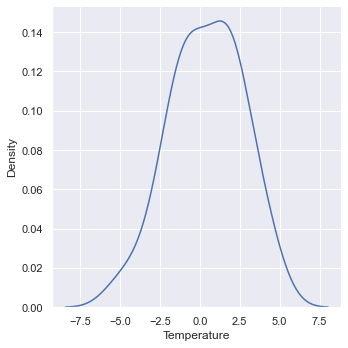

In [44]:
#2 distribution plot residual data
residual=y_test-y_pred
residual
sns.displot(residual,kind="kde")

# A gaussian distribution of the residual is expected as seen below, hence OK

Text(0, 0.5, 'residual data')

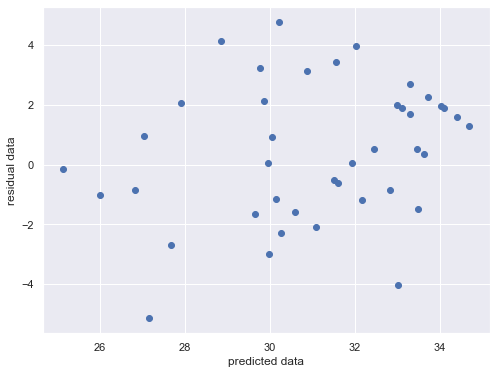

In [45]:
#3) scatter plot of residual vs predicted value
plt.scatter(y_pred,residual)
plt.xlabel("predicted data")
plt.ylabel("residual data")

# a uniform distribution is expected as seen below between predicted and residual data, hence OK

In [46]:
#Performance matrix
# R-square
from sklearn.metrics import r2_score
r_square=r2_score(y_test,y_pred)
print(r_square)

0.6175334199832951


In [47]:
## Adjusted R square
1 - (1-r_square)*(len(y_test)-1)/(len(y_test)-x_test.shape[1]-1)

0.4536191714047073

# lets predict the temperature using  Elastic Net

In [48]:
from sklearn.linear_model import ElasticNet
elastic=ElasticNet()
elastic

ElasticNet()

In [49]:
elastic.fit(x_train,y_train)

ElasticNet()

In [51]:
y_pred=elastic.predict(x_test)
y_pred

array([31.7542906 , 30.06502229, 30.10035275, 30.88516649, 30.8570863 ,
       30.74984358, 30.43460288, 28.01081916, 33.30204237, 30.12712484,
       28.26555204, 31.14406373, 29.55135985, 30.06762414, 31.80016296,
       30.29101325, 33.01850329, 33.23435152, 31.5780951 , 30.80361398,
       32.50736903, 32.5521635 , 31.57580146, 28.59491292, 33.12911014,
       30.32185198, 29.32777481, 28.71710635, 33.51558874, 31.98389742,
       30.63307998, 28.65316548, 31.61843919, 27.3695023 , 31.36195201,
       32.40292812, 32.81675595, 32.66208358, 30.53779163, 32.85102817,
       33.34552463])

Assumption of linear regression(below)
used to check whether the training model is good or bad

Text(0, 0.5, 'Test Predicted Data')

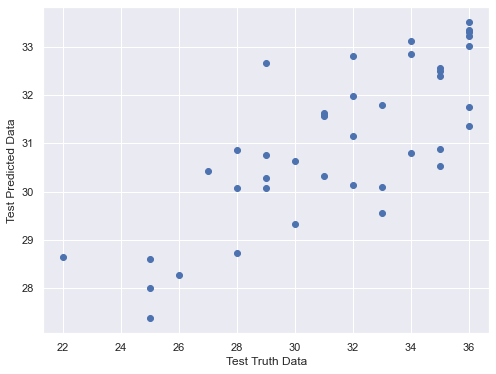

In [52]:


# 1) scatter plot between test and predicted data
import matplotlib.pyplot as plt
plt.scatter(y_test,y_pred)
plt.xlabel("Test Truth Data")
plt.ylabel("Test Predicted Data")

# below plot shows test and predicted data has a linear correlation and hence ok

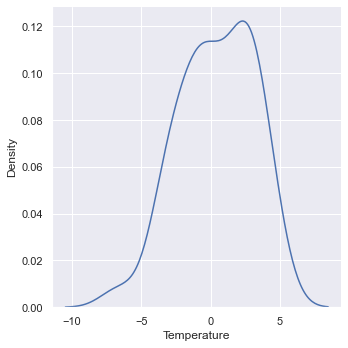

In [53]:
## 2) Distribution of residuals
residual=y_test-y_pred
residual
sns.displot(residual, kind="kde")

#distribution plot of the residual shows a gaussian distribution with slight left skew, hence ok

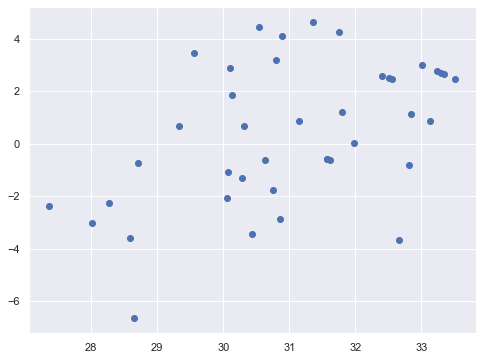

In [54]:
## 3) Scatter plot of predicted data and test data
plt.scatter(y_pred,residual)
#Scatter plot of predicted data and test data has a uniform distribution, hence ok

In [55]:
## Performance Metrics
#R Square-
from sklearn.metrics import r2_score
R_square=r2_score(y_test,y_pred)
print(R_square)


0.4776834492810931


In [56]:
## Adjusted R square

1 - (1-R_square)*(len(y_test)-1)/(len(y_test)-x_test.shape[1]-1)

0.2538334989729901

# Conclusion

1) linear regression- R Square=59 %, adjusted R square=41 %
2) ridge regression- R Square=61 %, adjusted R square=45 %
3) elastic net regression- R Square=47 %, adjusted R square=25 %

So from the above results, it is seen that -
a)ridge regression gives the best accuracy out of the three
b) Elastic net is not desired as the accuracy is lowest.

